In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import pickle
import pandas as pd
from scipy import stats

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

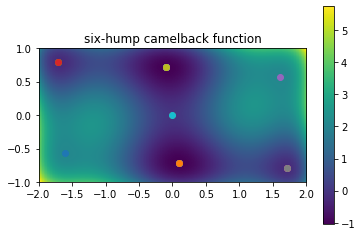

In [7]:
def fparams(params):
    x, y = params
    return (4-(2.1*(x**2))+((x**4)/3))*(x**2)+(x*y)+(4*(y**2)-4)*(y**2)
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
plt.imshow(fparams([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
plt.title("six-hump camelback function")

#finding local minima with diferent initial guess
fun = []
for i in range(4):
    for j in range(4):
        x0 = [-2+((i+1)*(0.5)),-1+((j+1)*(0.5))] # initial guess for finding local minima 
        solution = optimize.minimize(fparams,x0)
        plt.scatter(solution ["x"][0],solution ["x"][1])
    for k in range(4):
        x0 = [+2-((i+1)*(0.5)),+1-((k+1)*(0.5))] # initial guess for finding local minima 
        solution = optimize.minimize(fparams,x0)
        plt.scatter(solution["x"][0],solution["x"][1])  
        
# This function is even, the local and global minimas are symmetrical.
# So the function must has two global minimas.

# It has 7 local minima. One of them is in (0,0), so they are not 8 and we have 7 
# local minima.

# The initial guess (0,0) is not a good start point and 
# we have the local minima as global minima and it is wronge.

In [6]:
# two global minima

# the first global minima 
lower = np.linspace(-2, 2, 100)
upper = np.linspace(-1, 0, 100) # initial guess for finding global minima
x_y = []
z = []
for (l, u) in zip(lower, upper):
    x0 = [l, u]
    solutions = optimize.minimize(fparams,x0)
    x_y.append([solutions["x"]])
    z.append([solutions["fun"]])
    
z = np.array(z) 
x_y = np.array(x_y) 
print(" The first global minima is: ",min(z),"in (x,y):",x_y[np.where(min(z))])

# the second global minima 
lower = np.linspace(-2, 2, 100)
upper = np.linspace(0 ,1, 100) # the symmetrical initial guess for finding  another
                               # global minima. 
x_y = []
z = []
for (l, u) in zip(lower, upper):
    x0 = [l, u]
    solutions = optimize.minimize(fparams,x0)
    x_y.append([solutions["x"]])
    z.append([solutions["fun"]])
    
z = np.array(z) 
x_y = np.array(x_y) 
print(" The second global minima is: ",min(z),"in (x,y):",x_y[np.where(min(z))])

 The first global minima is:  [-1.03162845] in (x,y): [[[ 0.08984184 -0.71265628]]]
 The second global minima is:  [-1.03162845] in (x,y): [[[-0.08984197  0.7126567 ]]]


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

time for max:
473 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


parameters for max:
 [-0.01981352 -0.2977023   6.98085248  7.54545455]
covariance matrix for max:
 [[ 1.08567927e-03 -2.11707451e-02  1.14539155e-01 -1.48195207e-01]
 [-2.11707451e-02  4.22251663e-01 -2.35600137e+00  3.17561157e+00]
 [ 1.14539155e-01 -2.35600137e+00  1.37641629e+01 -1.99216700e+01]
 [-1.48195207e-01  3.17561157e+00 -1.99216700e+01  3.36614842e+01]]
a = -0.02 +- 0.03
b = -0.30 +- 0.65
c = 6.98 +- 3.71
d = 7.55 +- 5.80 

time for min:
530 µs ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


parameters for min :
 [ -0.13571614   1.14296814   6.44418544 -74.65656566]
covariance matrix for min:
 [[ 7.12881361e-03 -1.39011865e-01  7.52089828e-01 -9.73083035e-01]
 [-1.39011865e-01  2.77259926e+00 -1.54700344e+01  2.08517790e+01]
 [ 7.52089828e-01 -1.54700344e+01  9.03785864e+01 -1.30810158e+02]
 [-9.73083035e-01  2.08517790e+01 -1.30810158e+02  2.21028847e+02]]
a = -0.14 +

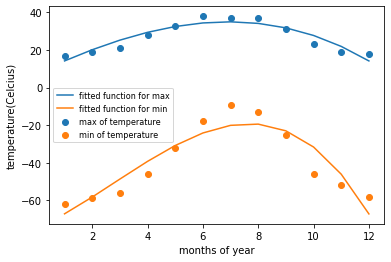

In [13]:
# ploting
max_t = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_t = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
plt.scatter(range(1,13),max_t, label = "max of temperature")
plt.scatter(range(1,13),min_t,label = "min of temperature")
plt.ylabel("temperature(Celcius)")
plt.xlabel("months of year")

# suitable a function  
def f(x, a, b, c, d):
    return (a * (x**3)) + (b * (x**2)) + (c * x) + d 

x = range(1,13)
x = np.array(x)

# fitting for max and plot
popt, pcov = optimize.curve_fit(f, x, max_t, p0=[6,6,6,6], full_output=False)

# time for max
print("time for max:")
%timeit optimize.curve_fit(f, x, max_t, p0=[6,6,6,6], full_output=False) 
print("\n")

print("parameters for max:\n", popt)
print("covariance matrix for max:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("d = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])),"\n")
plt.plot(x, f(x, popt[0], popt[1], popt[2], popt[3]), label='fitted function for max')

# fitting for min and plot
popt, pcov = optimize.curve_fit(f, x, min_t, p0=[6,6,6,6], full_output=False)

# time for min
print("time for min:")
%timeit optimize.curve_fit(f, x, min_t, p0=[6,6,6,6], full_output=False)
print("\n") 

print("parameters for min :\n", popt)
print("covariance matrix for min:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("d = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))
plt.plot(x, f(x, popt[0], popt[1], popt[2], popt[3]), label='fitted function for min')

plt.legend(prop = {"size":8})
plt.show()

# The fit is reasonable for both but fot the max data is beter than min and it causes by
# choicing the model and  it is not appropiate for min data and we must use another 
# model for min data.

# The time offset for min and max temperatures is same approximetly but max data makes 4µs 
# more than min data.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [187]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-06 23:11:11--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-06 23:11:13--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb64c08f968c8ad5f20bde95483.dl.dropboxusercontent.com/cd/0/inline/BdTiKNv9ajcT41X3OKaigbm2ytUt2fsNLDCrRMbLjj8PIOgSlOgddUgwoqE4AwPvt5XpWVcON1e2OF9GcBEtn0qpja-rKOY0pj68oxp2JD9EC1C0F1Bm8bLJIUBdO0fNA_6mWC2xqD4YwJDn39BRqko1/file# [following]
--2022-01-06 23:11:13--  https://ucb64c08f968c8ad5f20bde95483.dl.dropboxusercontent.com/cd/0/inline/BdTiKNv9ajcT41X3OKaigbm2ytUt2fsNLDCrRMbLjj8PIOgSlOgddUgwoqE4AwPvt5XpWVcO

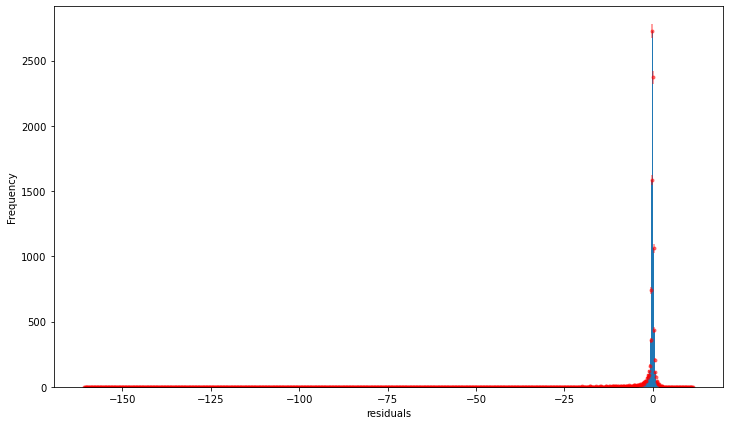

In [18]:
# reading data
data = pd.read_pickle('data/residuals_261.pkl')
d_l = data.tolist()
df = pd.DataFrame(d_l)

# plot histogeram
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
a = ax1.hist(df['residuals'], bins=1000, alpha=1) # a[0] is our bins and a[1] is our range
ax1.set_xlabel('residuals')
ax1.set_ylabel('Frequency')

# data points with errors.... 
b = []
for i in range(len(a[1])-1): # finding the bin centers for the error bar
    b.append((a[1][i]+a[1][i+1])/2)    
ax1.errorbar(b,a[0],a[0]**(0.5),fmt = ".",color = "r",alpha = 0.5)

plt.show()

parameters:
 [ 2.68173187e+03 -8.38416499e-02 -2.36180442e-01]
covariance matrix:
 [[1.36073470e+02 2.16255497e-08 7.98939591e-03]
 [2.16255497e-08 1.40726187e-06 3.62852763e-12]
 [7.98939591e-03 3.62852763e-12 1.40726334e-06]]
a = 2681.73 +- 11.67
b = -0.08 +- 0.00
c = -0.24 +- 0.00


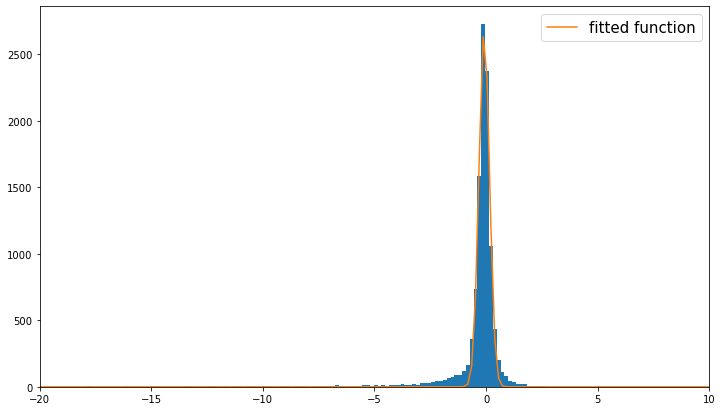

In [21]:
# fiting
def f(x, a, b, c):
    return a * np.exp((-((x-b)**2))/(2*(c**2)))

popt, pcov = optimize.curve_fit(f, b, a[0], p0=[2800,0,8], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

# plot fitting
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax2.hist(df['residuals'], bins=1000, alpha=1)
ax2.plot(b, f(b, popt[0], popt[1], popt[2]), label='fitted function')
ax2.set_xlim(-20, 10)
ax2.legend(prop = {"size":15})
plt.show()

In [47]:
# goodness-of-fit test

ndof = len(b) - 1
print("n degrees of freedom =", ndof)
chi2=0
for i in range(len(a[0])): # calculate the chi^2, gives the none, so separated the zero value of a[0]
    if a[0][i] != 0:
        chi2 += ((a[0][i] - f(b[i], popt[0], popt[1], popt[2]))**2) / a[0][i]        
print("chi2 =", chi2) 
pvalue = 1. - stats.chi2.cdf(chi2, ndof) # calculate the p-value from the chi^2, 
                                         # the n.d.o.f.,and the comulative chi^2 distribution.                                          
print("p-value =", pvalue)

n degrees of freedom = 999
chi2 = 15301.841163239278
p-value = 0.0


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [2]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt  

--2022-01-09 14:06:33--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-09 14:06:39--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5cf5d5fdb0414af9a308ac0eb4.dl.dropboxusercontent.com/cd/0/inline/BdeEDN5SCsd219bcVo8NAl4U4ZZITgz7WPZV8ezGsq9dxU2cSu5OxwjVtO-gLPJ9v4zqP3UKStSEi6xW4igvFj91YC-lAQqsPQaPYuNyJTzKL5O9PSbmOxKmUY0tTA4RFWFihTskE2qB72b67O0L32tp/file# [following]
--2022-01-09 14:06:40--  https://uc5cf5d5fdb0414af9a308ac0eb4.dl.dropboxusercontent.com/

In [41]:
# reading data
file = np.loadtxt('munich_temperatures_average_with_bad_data.txt', dtype='float', skiprows=1)
date = file[:,0]
temperatures = file[:,1]

a = -9.67 +- 0.18
b = -0.22 +- 0.02
c = 9.05 +- 0.12 

SSR of f(t): 694207.9881524295


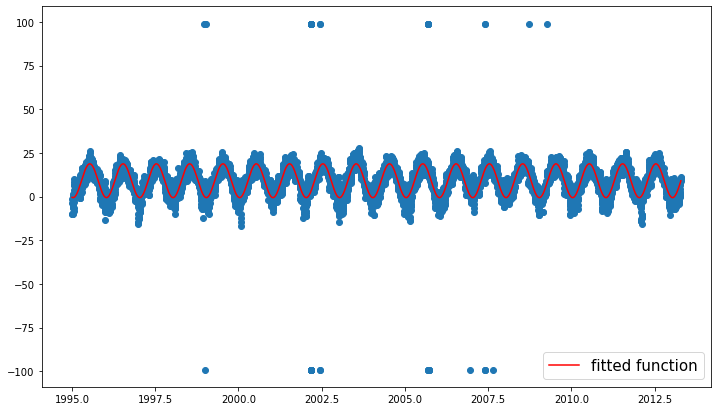

In [42]:
# fitting f(t)
def f(t, a, b, c):
    return a * np.cos(( 2 * (np.pi) * t ) + b ) + c

popt, pcov = optimize.curve_fit(f, date, temperatures, p0=[2, 0, 1], full_output=False)
#print("parameters:\n", popt)
#print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])),"\n")

# SSR for f(t)
ssr_f = np.sum((temperatures - f(date, popt[0], popt[1], popt[2]))**2)
ndof_f = 3 - 1 # n of parameters - 1
print("SSR of f(t):",ssr_f)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax1.scatter(date, temperatures)
ax1.plot(date, f(date, popt[0], popt[1], popt[2]), color="r", label='fitted function')
ax1.legend(prop = {"size":15})
plt.show()

In [43]:
# the min and max by the model (cos) and the parameters is:
# min = a * (1) + c = -9.99 + 9.38 = 0.62
# max = a * (-1) + c = 9.99 + 9.38 = 19.37

mean_t = temperatures.mean() 
print("The overall average temperature in Munich is:", mean_t)


# b changes the phase of cos.
# b makes shift  in time  and can change the time of the max and min temperature.

The overall average temperature in Munich is: 8.943104622162323


a = -9.67 +- 0.18
b = 1.00 +- 0.00
c = 3.06 +- 6.95
d = 9.05 +- 0.12 

SSR of g(t): 694184.3239734073


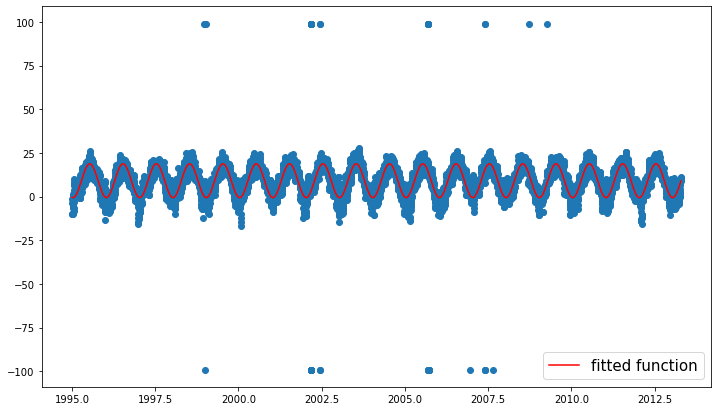

In [44]:
# fitting g(t)
def g(t, a, b, c, d):
    return a * np.cos(( 2 * (np.pi) * t * b ) + c ) + d

popt, pcov = optimize.curve_fit(g, date, temperatures, p0=[-9, 1, 0.2, 9], full_output=False)
#print("parameters:\n", popt)
#print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("d = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])),"\n")

# SSR for g(t)
ssr_g = np.sum((temperatures - g(date, popt[0], popt[1], popt[2], popt[3]))**2)
ndof_g = 4 - 1 # n of parameters - 1
print("SSR of g(t):",ssr_g)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax1.scatter(date, temperatures)
ax1.plot(date, g(date, popt[0], popt[1], popt[2], popt[3]), color="r", label='fitted function')
ax1.legend(prop = {"size":15})
plt.show()

In [46]:
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

print("f(t) vs g(t):")
cl_1_vs_2 = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, len(date), verbose=True)

f(t) vs g(t):
CL: 0.633 , additional parameter necessary: NO
